In [1]:
import pandas as pd
df = pd.read_csv('bank_customer.csv')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
df.shape

(10000, 12)

In [3]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [5]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df['products_number'].unique()

array([1, 3, 2, 4])

In [9]:
df = pd.get_dummies(df, columns=['country','gender'], drop_first=True)

In [10]:
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [26]:
df = df.drop(['customer_id'], axis=1)

In [27]:
Y = df['churn']
X = df.drop('churn', axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

GR = GradientBoostingClassifier()
GR.fit(X_train,Y_train)


GradientBoostingClassifier()

In [31]:
GR.decision_function(X_test)

array([-2.40046419, -0.09483304, -0.55297407, ...,  0.08250027,
       -2.73952225, -1.13913938])

In [32]:
#ROC curve and Area-Under-Curve (AUC)
from sklearn.metrics import roc_curve, auc
roc = roc_curve(Y_test, GR.decision_function(X_test))
res = auc(roc[0], roc[1])

<AxesSubplot:>

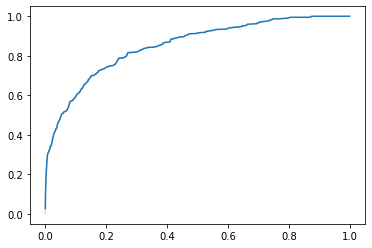

In [33]:
import seaborn as sns
sns.lineplot(x=roc[0], y=roc[1])

In [34]:
Y_pred = GR.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
print(f"{confusion_matrix(Y_test,Y_pred)}")

[[1563   54]
 [ 218  165]]


In [46]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
accuracy_score(Y_test,Y_pred)

0.864

In [49]:

result =[]
for lr in [0.05, 0.1, 0.25, 0.5, 0.75, 1]:
    GR = GradientBoostingClassifier(learning_rate=lr)
    GR.fit(X_train,Y_train)
    Y_ped = GR.predict(X_test)
    pr,re,fs,sp = precision_recall_fscore_support(Y_test,Y_pred)
    probs = GR.decision_function(X_test)
    # fpr, tpr, thresholds = roc_curve(Y_test,probs )
    # print(roc)
    result_local = {   
    'learning_rate': lr,
    'roc'  :roc_curve(Y_test,probs ),
    'auc' : roc_auc_score(Y_test, probs) ,
    'confusion_matrix' : confusion_matrix(Y_test,Y_pred),
    'accuracy_score' : accuracy_score(Y_test,Y_pred),
    'precision':pr,
    'recall':re,
    'fscore':fs,
    'support':sp
     }
    result.append(result_local)

    

    
    

In [51]:
ressult_df = pd.DataFrame(result)
ressult_df

,learning_rate,roc,auc,confusion_matrix,accuracy_score,precision,recall,fscore,support
0,0.05,"([0.0, 0.0, 0.0, 0.0006184291898577613, 0.0006...",0.851073,"[[1563, 54], [218, 165]]",0.864,"[0.8775968556990454, 0.7534246575342466]","[0.9666048237476809, 0.4308093994778068]","[0.9199529134785167, 0.5481727574750831]","[1617, 383]"
1,0.10,"([0.0, 0.0, 0.0, 0.0006184291898577613, 0.0006...",0.852099,"[[1563, 54], [218, 165]]",0.864,"[0.8775968556990454, 0.7534246575342466]","[0.9666048237476809, 0.4308093994778068]","[0.9199529134785167, 0.5481727574750831]","[1617, 383]"
2,0.25,"([0.0, 0.0, 0.0, 0.0006184291898577613, 0.0006...",0.846862,"[[1563, 54], [218, 165]]",0.864,"[0.8775968556990454, 0.7534246575342466]","[0.9666048237476809, 0.4308093994778068]","[0.9199529134785167, 0.5481727574750831]","[1617, 383]"
3,0.50,"([0.0, 0.0006184291898577613, 0.00061842918985...",0.834338,"[[1563, 54], [218, 165]]",0.864,"[0.8775968556990454, 0.7534246575342466]","[0.9666048237476809, 0.4308093994778068]","[0.9199529134785167, 0.5481727574750831]","[1617, 383]"
4,0.75,"([0.0, 0.0, 0.0, 0.0006184291898577613, 0.0006...",0.821758,"[[1563, 54], [218, 165]]",0.864,"[0.8775968556990454, 0.7534246575342466]","[0.9666048237476809, 0.4308093994778068]","[0.9199529134785167, 0.5481727574750831]","[1617, 383]"
5,1.00,"([0.0, 0.0006184291898577613, 0.00123685837971...",0.800393,"[[1563, 54], [218, 165]]",0.864,"[0.8775968556990454, 0.7534246575342466]","[0.9666048237476809, 0.4308093994778068]","[0.9199529134785167, 0.5481727574750831]","[1617, 383]"


<AxesSubplot:xlabel='learning_rate', ylabel='auc'>

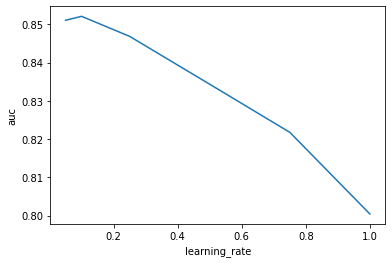

In [52]:
sns.lineplot(x=ressult_df['learning_rate'], y=ressult_df['auc'])